## ECE 462 - Homework #5a

## Package Imports

In [1]:
import numpy as np
from numpy import linalg as la
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

## Constants

In [2]:
del_x = 1e-11
NN = 1000

DX = del_x * 1e9
XX = np.arange(DX, DX * NN + DX, DX)

hbar = 1.054e-34
m0 = 9.11e-31
ecoil = 1.6e-19
eV2J = 1.6e-19
J2eV = 1.0 / eV2J
hbar_ev = hbar * J2eV
chi0 = hbar ** 2 / (2 * m0 * (del_x ** 2))

## Create the $V(x)$ Potential

In [3]:
V = np.zeros((NN))
V[300:400] = 0.1 * eV2J

## Create the Hamiltonian Matrix

In [4]:
np.set_printoptions(precision=2)
H = np.zeros((NN, NN))
for diag in range(NN):
    H[diag, diag] = 2 * chi0 + V[diag] # Assign diagonals
    try:
        H[diag, diag + 1] = -chi0      # Assign col+1
    except IndexError:
        pass
    try:
        H[diag, diag - 1] = -chi0      # Assign col-1
    except IndexError:
        pass
    H[0, NN-1] = 0

## Get the `eps` and `phi` arrays from the Hamiltonian Matrix

In [5]:
eps, phi = la.eig(H)
indices = np.argsort(eps)

## Plot the Function and it's Eigenstates

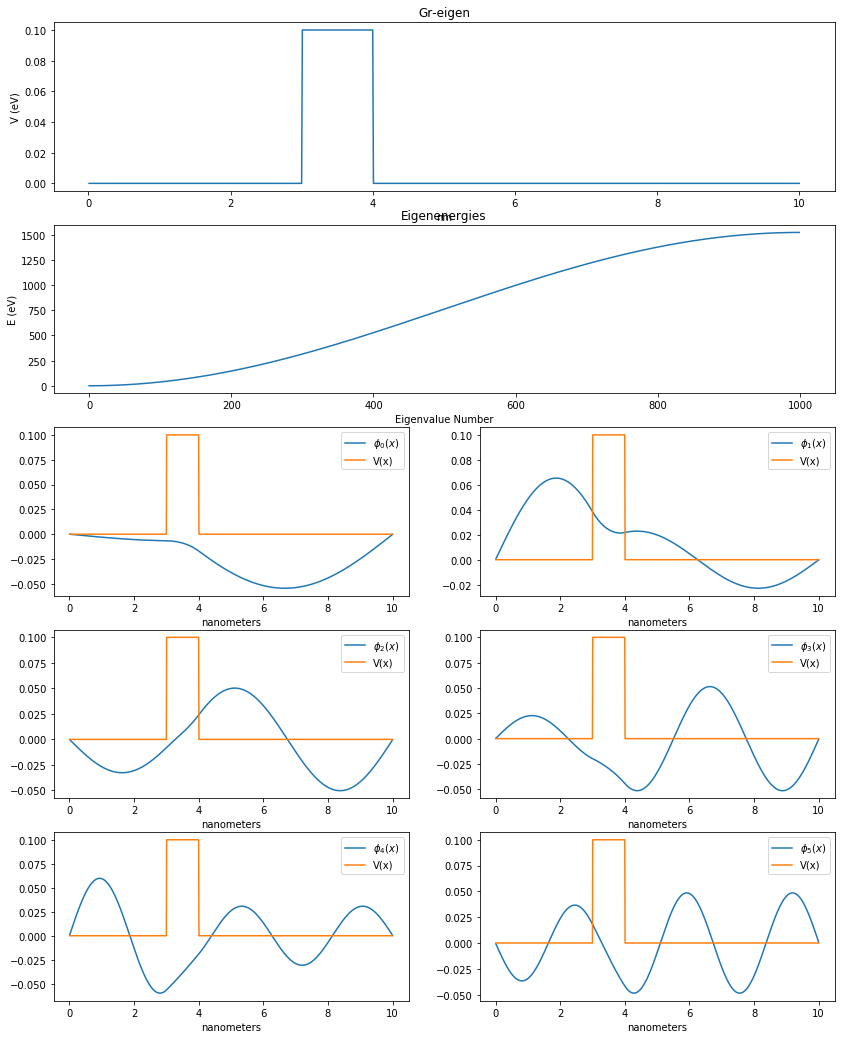

In [6]:
rcParams['figure.figsize'] = 14, 18
plt.subplot(511)
plt.title('Gr-eigen')
plt.plot(XX, J2eV * V)
plt.xlabel('nm')
plt.ylabel('V (eV)')

plt.subplot(512)
plt.title('Eigenenergies')
plt.plot(np.arange(NN), [J2eV * eps[indices][m] for m in range(NN)])
plt.xlabel('Eigenvalue Number')
plt.ylabel('E (eV)')

for i in range(6):
    plt.subplot(5, 2, 2*2+1+i)
    plt.plot(XX, phi[:, indices[i]], label=r"$\phi_{}(x)$".format(i))
    plt.plot(XX, J2eV * V, label=r'V(x)')
    plt.ylabel('E (eV)')
    plt.xlabel("nanometers")
    plt.legend()